# Azure Computer Vision 4 (Florence)

## Image Analysis with Azure Computer Vision 4

![Image](florence.jpg)

The **Computer Vision Image Analysis** service can extract a wide variety of visual features from your images. For example, it can determine whether an image contains adult content, find specific brands or objects, or find human faces.

The latest version of Image Analysis, 4.0, which is now in public preview, has new features like synchronous OCR and people detection. We recommend you use this version going forward.

You can use Image Analysis through a client library SDK or by calling the REST API directly. Follow the quickstart to get started.

https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/overview-image-analysis?tabs=4-0

Azure Computer Vision updates:
https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/whats-new#march-2023
<br><br>
> Serge Retkowsky | Microsoft | https://github.com/retkowsky | 3rd of May, 2023

In [1]:
import os
import requests
import sys

from dotenv import load_dotenv
from PIL import Image
from pprintjson import pprintjson

In [2]:
sys.version

'3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]'

## Azure Computer Vision 4

In [3]:
load_dotenv("azure.env")

key = os.getenv("azure_cv_key")
endpoint = os.getenv("azure_cv_endpoint")

In [4]:
options = "&features=tags,objects,caption,read,smartCrops,denseCaptions,people"
model = "?api-version=2023-02-01-preview&modelVersion=latest"

url = endpoint + "/computervision/imageanalysis:analyze" + model + options

headers = {"Content-type": "application/octet-stream", "Ocp-Apim-Subscription-Key": key}

## Images

In [5]:
IMAGES_DIR = "images"

image_extensions = (".jpg", ".jpeg", ".png", ".gif")
image_files = [f for f in os.listdir(IMAGES_DIR) if f.endswith(image_extensions)]
image_files

['arc_triomphe.jpg',
 'businesscard.jpg',
 'car.jpg',
 'car.png',
 'car2.jpg',
 'cars.jpg',
 'cat.jpg',
 'drinks.jpg',
 'fashionprocess.png',
 'fruits.jpg',
 'image1.jpg',
 'office.jpg',
 'postalcard.jpg',
 'presentation.png',
 'sand.jpg',
 'street.jpg',
 'tomato.jpg',
 'whitecar.jpg']

## Test 1

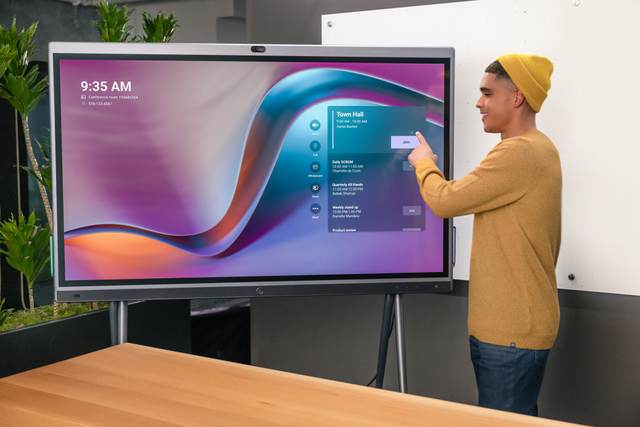

In [6]:
image_file = os.path.join(IMAGES_DIR, "presentation.png")

img = Image.open(image_file)
img.thumbnail((640, 640), Image.LANCZOS)
img

In [7]:
with open(image_file, "rb") as f:
    data = f.read()

r = requests.post(url, data=data, headers=headers)

results = r.json()
pprintjson(results)

{
    "captionResult": {
        "text": "a man pointing at a screen",
        "confidence": 0.7767596244812012
    },
    "objectsResult": {
        "values": [
            {
                "boundingBox": {
                    "x": 655,
                    "y": 83,
                    "w": 263,
                    "h": 605
                },
                "tags": [
                    {
                        "name": "person",
                        "confidence": 0.905
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 75,
                    "y": 76,
                    "w": 678,
                    "h": 414
                },
                "tags": [
                    {
                        "name": "television",
                        "confidence": 0.808
                    }
                ]
            }
        ]
    },
    "readResult": {
        "stringIndexType": "TextElements",
        "c

In [8]:
pprintjson(results)

{
    "captionResult": {
        "text": "a man pointing at a screen",
        "confidence": 0.489955872297287
    },
    "objectsResult": {
        "values": [
            {
                "boundingBox": {
                    "x": 655,
                    "y": 83,
                    "w": 263,
                    "h": 605
                },
                "tags": [
                    {
                        "name": "person",
                        "confidence": 0.905
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 75,
                    "y": 76,
                    "w": 678,
                    "h": 414
                },
                "tags": [
                    {
                        "name": "television",
                        "confidence": 0.808
                    }
                ]
            }
        ]
    },
    "readResult": {
        "stringIndexType": "TextElements",
        "co

In [10]:
pprintjson(results["modelVersion"])

"2023-02-01-preview"


In [11]:
pprintjson(results["metadata"])

{
    "width": 1038,
    "height": 692
}


In [12]:
pprintjson(results["captionResult"])

{
    "text": "a man pointing at a screen",
    "confidence": 0.7767596244812012
}


In [13]:
pprintjson(results["objectsResult"])

{
    "values": [
        {
            "boundingBox": {
                "x": 655,
                "y": 83,
                "w": 263,
                "h": 605
            },
            "tags": [
                {
                    "name": "person",
                    "confidence": 0.905
                }
            ]
        },
        {
            "boundingBox": {
                "x": 75,
                "y": 76,
                "w": 678,
                "h": 414
            },
            "tags": [
                {
                    "name": "television",
                    "confidence": 0.808
                }
            ]
        }
    ]
}


In [14]:
pprintjson(results["denseCaptionsResult"])

{
    "values": [
        {
            "text": "a man pointing at a screen",
            "confidence": 0.7767596244812012,
            "boundingBox": {
                "x": 0,
                "y": 0,
                "w": 1038,
                "h": 692
            }
        },
        {
            "text": "a screen shot of a computer",
            "confidence": 0.7600216269493103,
            "boundingBox": {
                "x": 62,
                "y": 51,
                "w": 673,
                "h": 437
            }
        },
        {
            "text": "a man pointing at a screen",
            "confidence": 0.7741549611091614,
            "boundingBox": {
                "x": 646,
                "y": 63,
                "w": 269,
                "h": 605
            }
        },
        {
            "text": "a close up of a table",
            "confidence": 0.7473422288894653,
            "boundingBox": {
                "x": 0,
                "y": 536,
                "w

In [15]:
pprintjson(results["tagsResult"])

{
    "values": [
        {
            "name": "text",
            "confidence": 0.9966012835502625
        },
        {
            "name": "clothing",
            "confidence": 0.9801061749458313
        },
        {
            "name": "person",
            "confidence": 0.9596298933029175
        },
        {
            "name": "display device",
            "confidence": 0.9490274786949158
        },
        {
            "name": "indoor",
            "confidence": 0.947483241558075
        },
        {
            "name": "wall",
            "confidence": 0.9395942091941833
        },
        {
            "name": "media",
            "confidence": 0.9306115508079529
        },
        {
            "name": "television set",
            "confidence": 0.9280921816825867
        },
        {
            "name": "led-backlit lcd display",
            "confidence": 0.9254803657531738
        },
        {
            "name": "flat panel display",
            "confidence": 0.920946240

In [16]:
pprintjson(results["readResult"])

{
    "stringIndexType": "TextElements",
    "content": "9:35 AM\nE Conference room 154584354\n#: 555-173-4547\nTown Hall\n9:00 AM - 10:00 AM\nAaron Buaion\nDaily SCRUM\n10:00 AM 11:00 AM\nChurlette de Crum\nQuarterly NI Hands\n11.00 AM-12:00 PM\nBebek Shaman\nWeekly stand up\n12:00 PM-1:00 PM\nDelle Marckre\nProduct review",
    "pages": [
        {
            "height": 692.0,
            "width": 1038.0,
            "angle": 0.3048,
            "pageNumber": 1,
            "words": [
                {
                    "content": "9:35",
                    "boundingBox": [
                        131.0,
                        130.0,
                        171.0,
                        130.0,
                        171.0,
                        149.0,
                        130.0,
                        149.0
                    ],
                    "confidence": 0.993,
                    "span": {
                        "offset": 0,
                        "length": 4


In [17]:
pprintjson(results["readResult"]["content"])

"9:35 AM\nE Conference room 154584354\n#: 555-173-4547\nTown Hall\n9:00 AM - 10:00 AM\nAaron Buaion\nDaily SCRUM\n10:00 AM 11:00 AM\nChurlette de Crum\nQuarterly NI Hands\n11.00 AM-12:00 PM\nBebek Shaman\nWeekly stand up\n12:00 PM-1:00 PM\nDelle Marckre\nProduct review"


In [18]:
pprintjson(results["smartCropsResult"])

{
    "values": [
        {
            "aspectRatio": 1.09,
            "boundingBox": {
                "x": 303,
                "y": 29,
                "w": 692,
                "h": 634
            }
        }
    ]
}


In [19]:
pprintjson(results["peopleResult"])

{
    "values": [
        {
            "boundingBox": {
                "x": 659,
                "y": 82,
                "w": 256,
                "h": 594
            },
            "confidence": 0.9592611193656921
        },
        {
            "boundingBox": {
                "x": 0,
                "y": 1,
                "w": 200,
                "h": 507
            },
            "confidence": 0.00403070030733943
        },
        {
            "boundingBox": {
                "x": 0,
                "y": 7,
                "w": 69,
                "h": 509
            },
            "confidence": 0.0024984374176710844
        },
        {
            "boundingBox": {
                "x": 0,
                "y": 0,
                "w": 203,
                "h": 141
            },
            "confidence": 0.001100298948585987
        }
    ]
}


## Test 2

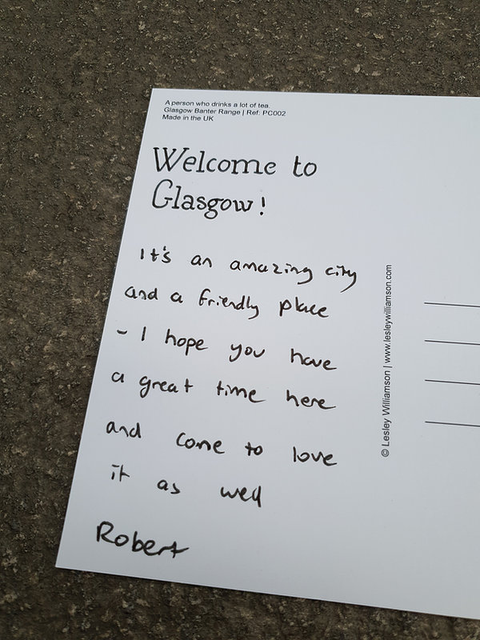

In [23]:
image_file = os.path.join(IMAGES_DIR, "postalcard.jpg")

img = Image.open(image_file)
img.thumbnail((640, 640), Image.LANCZOS)
img

In [25]:
with open(image_file, "rb") as f:
    data = f.read()

r = requests.post(url, data=data, headers=headers)

results = r.json()
pprintjson(results)

{
    "captionResult": {
        "text": "a white paper with black writing on it",
        "confidence": 0.7382187843322754
    },
    "objectsResult": {
        "values": []
    },
    "readResult": {
        "stringIndexType": "TextElements",
        "content": "A person who drinks a lot of tea.\nGlasgow Banter Range | Ref: PC002\nMade in the UK\nWelcome to\nGlasgow !\nIt's an amazing city\nand a friendly place\n- I hope you have\na great time here\nand come to love\n@ Lesley Williamson | www.lesleywilliamson.com\nit as wel\nRobert",
        "pages": [
            {
                "height": 800.0,
                "width": 600.0,
                "angle": 5.3622,
                "pageNumber": 1,
                "words": [
                    {
                        "content": "A",
                        "boundingBox": [
                            207.0,
                            124.0,
                            210.0,
                            124.0,
                        

In [26]:
print(results["readResult"]["content"])

A person who drinks a lot of tea.
Glasgow Banter Range | Ref: PC002
Made in the UK
Welcome to
Glasgow !
It's an amazing city
and a friendly place
- I hope you have
a great time here
and come to love
@ Lesley Williamson | www.lesleywilliamson.com
it as wel
Robert


## Test 3

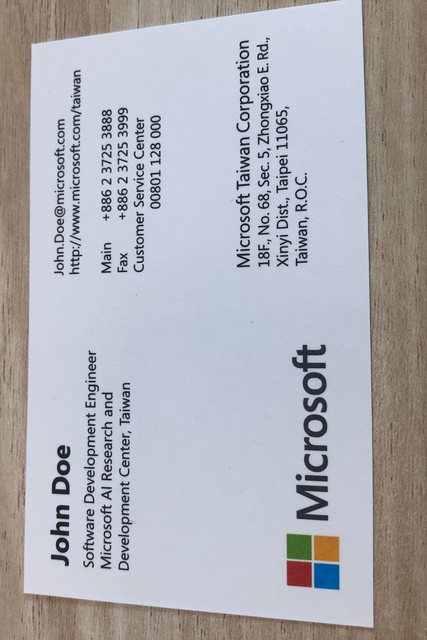

In [27]:
image_file = os.path.join(IMAGES_DIR, "businesscard.jpg")

img = Image.open(image_file)
img.thumbnail((640, 640), Image.LANCZOS)
img

In [28]:
with open(image_file, "rb") as f:
    data = f.read()

r = requests.post(url, data=data, headers=headers)

results = r.json()
pprintjson(results)

{
    "captionResult": {
        "text": "a business card on a table",
        "confidence": 0.7714636921882629
    },
    "objectsResult": {
        "values": []
    },
    "readResult": {
        "stringIndexType": "TextElements",
        "content": "John Doe\nJohn.Doe@microsoft.com\nhttp://www.microsoft.com/taiwan\nSoftware Development Engineer\nMicrosoft Al Research and\nMain\n+886 2 3725 3888\nDevelopment Center, Taiwan\nFax\n+886 2 3725 3999\nCustomer Service Center\n00801 128 000\nMicrosoft Taiwan Corporation\n18F ., No. 68, Sec. 5, Zhongxiao E. Rd .,\nXinyi Dist ., Taipei 11065,\nMicrosoft\nTaiwan, R.O.C.",
        "pages": [
            {
                "height": 1632.0,
                "width": 2448.0,
                "angle": 0.1305,
                "pageNumber": 1,
                "words": [
                    {
                        "content": "John",
                        "boundingBox": [
                            280.0,
                            186.0,
        

In [22]:
print(results["readResult"]["content"])

A person who drinks a lot of tea.
Glasgow Banter Range | Ref: PC002
Made in the UK
Welcome to
Glasgow !
It's an amazing city
and a friendly place
- I hope you have
a great time here
and come to love
@ Lesley Williamson | www.lesleywilliamson.com
it as wel
Robert


## Test 4

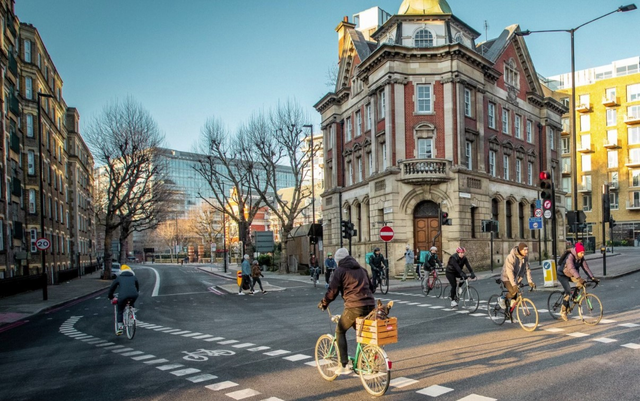

In [29]:
image_file = os.path.join(IMAGES_DIR, "street.jpg")

img = Image.open(image_file)
img.thumbnail((640, 640), Image.LANCZOS)
img

In [30]:
with open(image_file, "rb") as f:
    data = f.read()

r = requests.post(url, data=data, headers=headers)

results = r.json()
pprintjson(results)

{
    "captionResult": {
        "text": "a group of people riding bicycles in a city",
        "confidence": 0.7912733554840088
    },
    "objectsResult": {
        "values": [
            {
                "boundingBox": {
                    "x": 941,
                    "y": 466,
                    "w": 64,
                    "h": 138
                },
                "tags": [
                    {
                        "name": "person",
                        "confidence": 0.622
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 1053,
                    "y": 466,
                    "w": 70,
                    "h": 127
                },
                "tags": [
                    {
                        "name": "person",
                        "confidence": 0.555
                    }
                ]
            },
            {
                "boundingBox": {
                    "x": 59

In [31]:
pprintjson(results["captionResult"])

{
    "text": "a group of people riding bicycles in a city",
    "confidence": 0.7912733554840088
}


In [32]:
pprintjson(results["objectsResult"])

{
    "values": [
        {
            "boundingBox": {
                "x": 941,
                "y": 466,
                "w": 64,
                "h": 138
            },
            "tags": [
                {
                    "name": "person",
                    "confidence": 0.622
                }
            ]
        },
        {
            "boundingBox": {
                "x": 1053,
                "y": 466,
                "w": 70,
                "h": 127
            },
            "tags": [
                {
                    "name": "person",
                    "confidence": 0.555
                }
            ]
        },
        {
            "boundingBox": {
                "x": 598,
                "y": 628,
                "w": 46,
                "h": 92
            },
            "tags": [
                {
                    "name": "Bicycle wheel",
                    "confidence": 0.531
                }
            ]
        },
        {
            "b

In [29]:
pprintjson(results["denseCaptionsResult"])

{
    "values": [
        {
            "text": "a group of people riding bicycles in a city",
            "confidence": 0.5083345770835876,
            "boundingBox": {
                "x": 0,
                "y": 0,
                "w": 1206,
                "h": 756
            }
        },
        {
            "text": "a person riding a bicycle with a dog in a basket",
            "confidence": 0.5466610789299011,
            "boundingBox": {
                "x": 584,
                "y": 459,
                "w": 154,
                "h": 283
            }
        },
        {
            "text": "a person riding a bike",
            "confidence": 0.5519154667854309,
            "boundingBox": {
                "x": 1029,
                "y": 449,
                "w": 105,
                "h": 161
            }
        },
        {
            "text": "a person riding a bike",
            "confidence": 0.5464051365852356,
            "boundingBox": {
                "x": 833,
   

In [30]:
pprintjson(results["tagsResult"])

{
    "values": [
        {
            "name": "outdoor",
            "confidence": 0.9991688132286072
        },
        {
            "name": "building",
            "confidence": 0.9910473823547363
        },
        {
            "name": "road",
            "confidence": 0.9782278537750244
        },
        {
            "name": "sky",
            "confidence": 0.9767833352088928
        },
        {
            "name": "street",
            "confidence": 0.9664870500564575
        },
        {
            "name": "bicycle wheel",
            "confidence": 0.9168410301208496
        },
        {
            "name": "land vehicle",
            "confidence": 0.9047801494598389
        },
        {
            "name": "vehicle",
            "confidence": 0.8851263523101807
        },
        {
            "name": "pedestrian",
            "confidence": 0.8809370994567871
        },
        {
            "name": "town",
            "confidence": 0.8585145473480225
        },
        

In [33]:
pprintjson(results["peopleResult"])

{
    "values": [
        {
            "boundingBox": {
                "x": 599,
                "y": 464,
                "w": 112,
                "h": 242
            },
            "confidence": 0.888308048248291
        },
        {
            "boundingBox": {
                "x": 202,
                "y": 495,
                "w": 62,
                "h": 135
            },
            "confidence": 0.8724349737167358
        },
        {
            "boundingBox": {
                "x": 838,
                "y": 463,
                "w": 60,
                "h": 115
            },
            "confidence": 0.8654031157493591
        },
        {
            "boundingBox": {
                "x": 939,
                "y": 454,
                "w": 71,
                "h": 153
            },
            "confidence": 0.861977756023407
        },
        {
            "boundingBox": {
                "x": 1046,
                "y": 453,
                "w": 81,
                "h